In [1]:
from google.colab import files
uploaded = files.upload()

Saving spambase_data.csv to spambase_data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn import tree

In [4]:
df = pd.read_csv('spambase_data.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [5]:
x = df[df.columns[:-1]]
y = df[df.shape[1]-1]



In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=1)

In [13]:
dtree1 = tree.DecisionTreeClassifier()
dtree1 = dtree1.fit(x_train,y_train)

In [14]:
pred1 = dtree1.predict(x_test)

In [15]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       564
           1       0.88      0.89      0.89       357

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921



In [16]:
print(confusion_matrix(y_test,pred1))

[[522  42]
 [ 39 318]]


In [17]:
print(accuracy_score(y_test,pred1))

0.9120521172638436


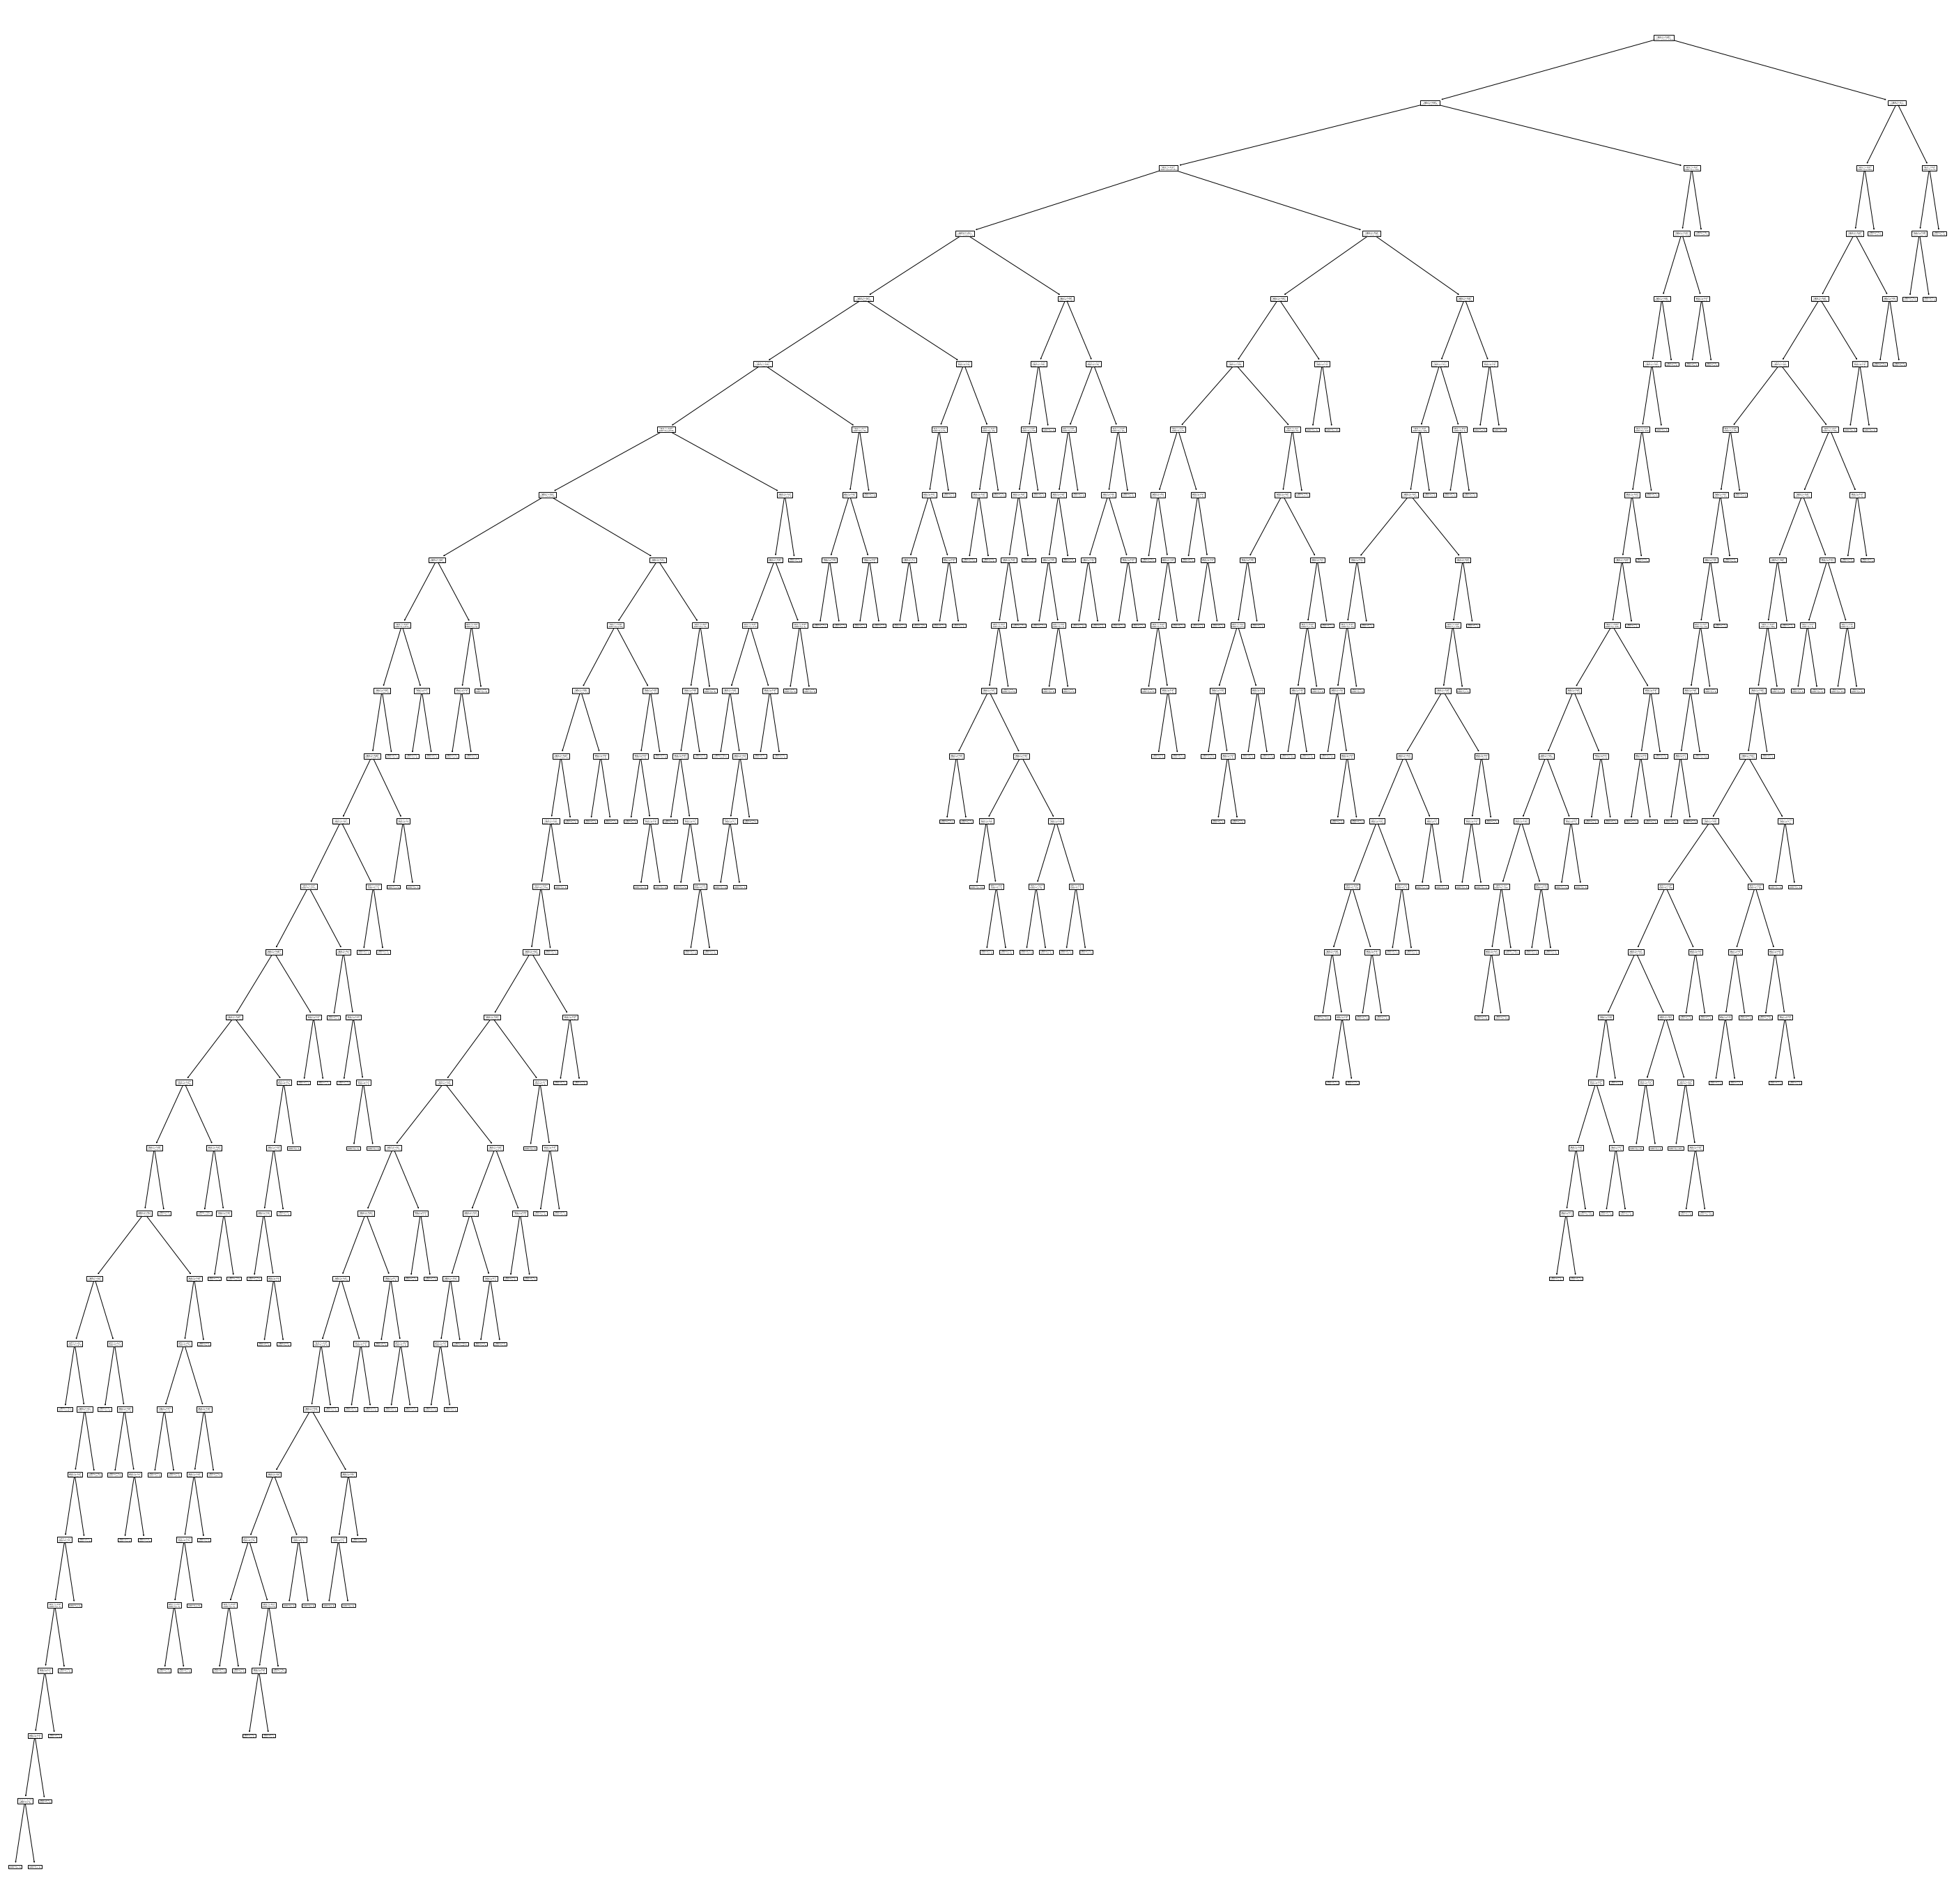

In [21]:
# Visualizing the tree
plt.figure(figsize=(50,50))
tree.plot_tree(dtree1)
plt.show()
#fig.savefig('decision_tree.png')


In [24]:
# exporting the tree
import graphviz 
dot_data = tree.export_graphviz(dtree1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("spambase") 

'spambase.pdf'

In [46]:
class_name = ['0','1']

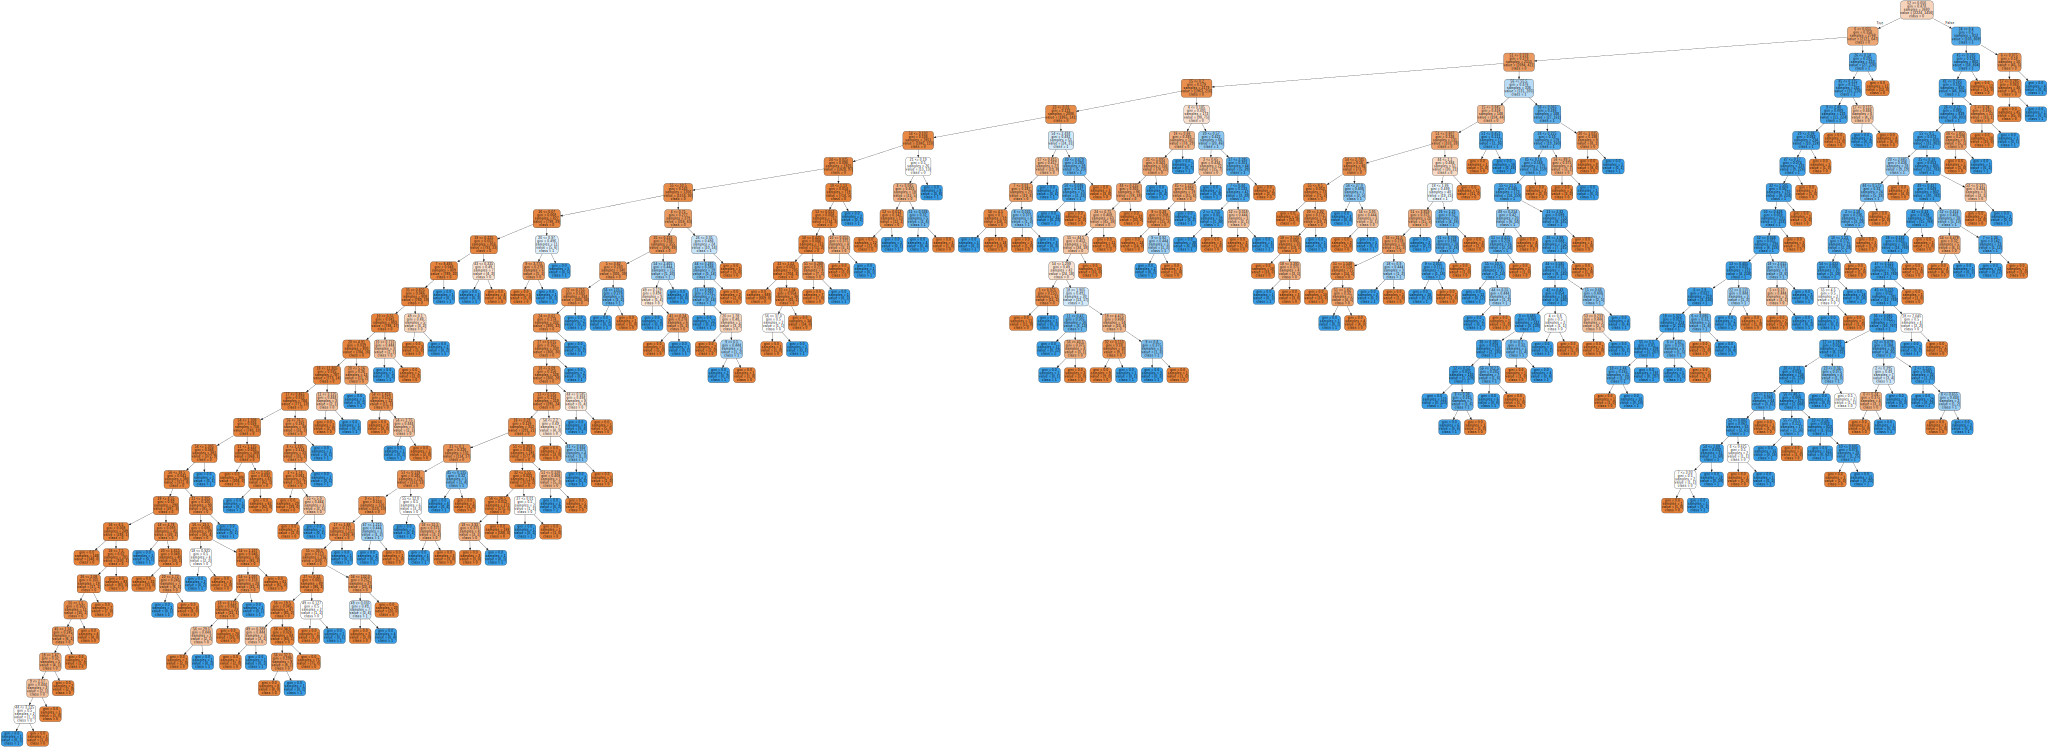

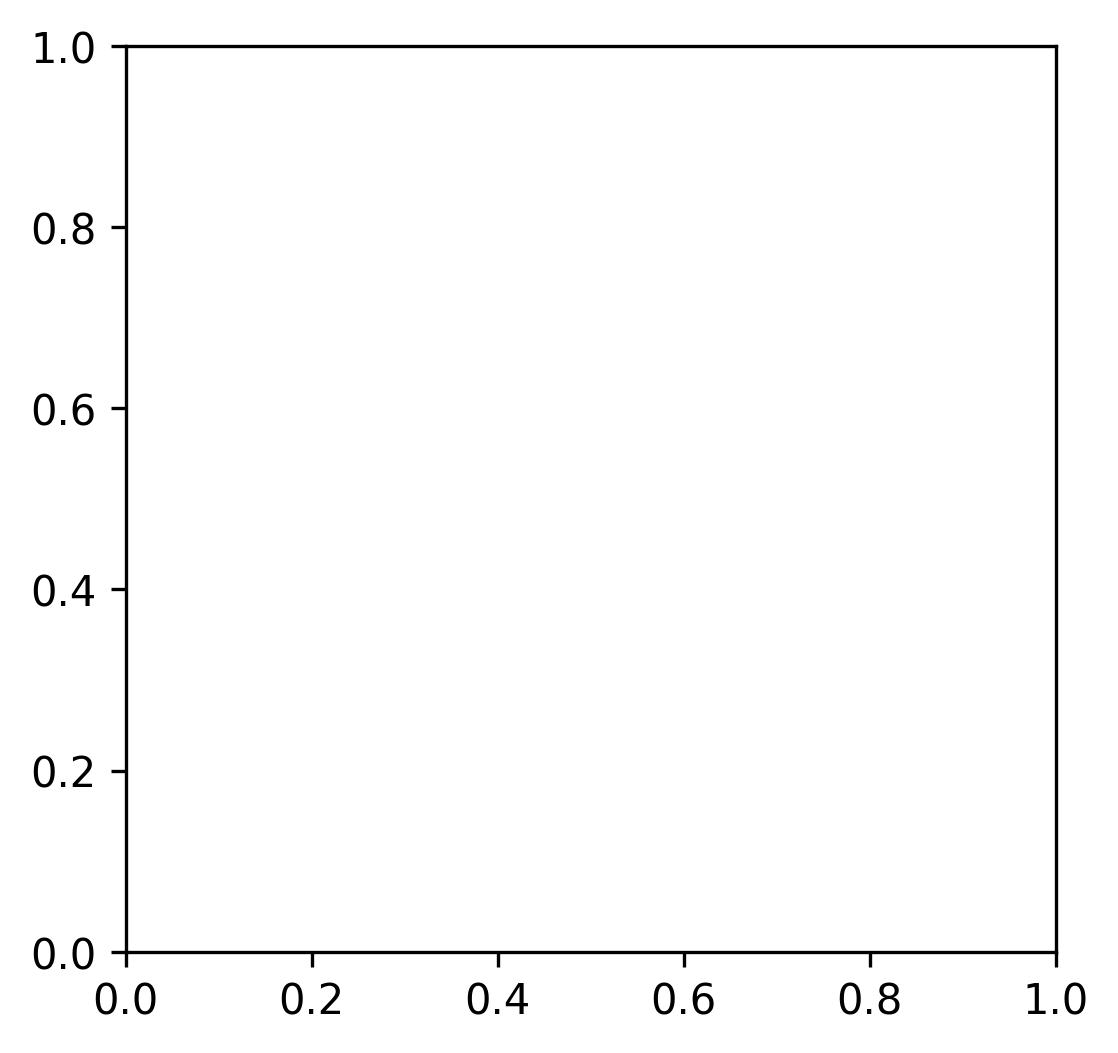

In [50]:
dot_data = tree.export_graphviz(dtree1, out_file=None, 
                     feature_names= x.columns,  
                     class_names= class_name,  
                     filled=True, rounded=True,  
                     )  
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

graph = graphviz.Source(dot_data)  
graph 

# ASSIGNMENT

## 1. Decision stump + majority class error

In [56]:
'''
entropy
Link : https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php

''' 
dtree1 = tree.DecisionTreeClassifier(max_depth = 1, random_state=1)
dtree1.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=1, random_state=1)

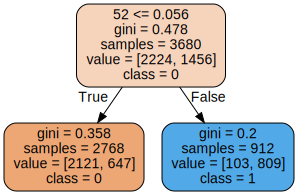

In [60]:
class_name = ['0','1']

dot_data = tree.export_graphviz(dtree1, out_file=None, 
                     feature_names= x_train.columns,  
                     class_names= class_name,  
                     filled=True, rounded=True,  
                     )  
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

graph = graphviz.Source(dot_data)  
graph



In [61]:
y_pred1 = dtree1.predict(x_test)

print('error = ', 1 - accuracy_score(y_test,y_pred1))


error =  0.21606948968512485


## Class distribution in Decision Stump


*   0 -> 3471 samples
*   1-> 1130 samples

Majority class = 0
Error = 21.61 %



# 2. Gini Index vs Entropy metric comparison of 2 DTs

In [64]:
dtree_gini = tree.DecisionTreeClassifier(criterion = "gini", random_state=30)
dtree_gini.fit(x_train,y_train)


dtree_entropy = tree.DecisionTreeClassifier(criterion = "entropy", random_state=30)
dtree_entropy.fit(x_train,y_train)

# Training both Trees on same dataset 
dtree_gini.fit(x_train, y_train)
dtree_entropy.fit(x_train, y_train)

# PRedicitons
y_pred_gini = dtree_gini.predict(x_test)
y_pred_entropy = dtree_entropy.predict(x_test)

# comparing accuracies
print('GINI accuracy score = ', accuracy_score(y_test, y_pred_gini))
print('ENTROPY accuracy score = ', accuracy_score(y_test, y_pred_entropy))


GINI accuracy score =  0.9153094462540716
ENTROPY accuracy score =  0.9163952225841476


*Result*: Both the metrics gave similar performance, but **Entropy meaure** slighlty gave **better accuracy score**

# 3. MAx_depth of tree vs Accuracy score 

Ref: https://www.kaggle.com/code/dmytrol/impact-of-decision-tree-depth-on-the-accuracy 

In [66]:
#import necessary libraries
import graphviz
from IPython.display import Image  
from subprocess import call
from sklearn.metrics import accuracy_score
import pydotplus

In [73]:
error_train_array = []
error_valid_array = []

for depth in range(1,100):
  decision_tree = tree.DecisionTreeClassifier(max_depth = depth)
  decision_tree = decision_tree.fit(x_train, y_train)

  # Training Accuracy
  y_pred1 = decision_tree.predict(x_train)
  acc_train = accuracy_score(y_train, y_pred1)
  error_train_array.append(1-acc_train)

  # Testing Accuracy
  y_pred2 = decision_tree.predict(x_test)
  acc_valid = accuracy_score(y_test, y_pred2)
  error_valid_array.append(1-acc_valid)

  dot_data = tree.export_graphviz(decision_tree, 
                                out_file=None,
                                max_depth = depth,
                                filled=True, 
                                rounded=True,                                
                                special_characters=True,
                                class_names = ['0', '1'],
                                feature_names = x_train.columns.values)
  pydot_graph = pydotplus.graph_from_dot_data(dot_data)
  #pydot_graph.write_png('tree_max_depth' + str(depth) + '.png')


Training Error :
[0.20380434782608692, 0.1388586956521739, 0.1111413043478261, 0.09157608695652175, 0.07445652173913042, 0.06576086956521743, 0.05543478260869561, 0.04809782608695656, 0.04021739130434787, 0.033695652173913015, 0.027717391304347805, 0.02228260869565213, 0.017934782608695632, 0.015489130434782616, 0.01413043478260867, 0.011684782608695654, 0.010326086956521707, 0.008152173913043459, 0.006793478260869512, 0.005163043478260909, 0.0038043478260869623, 0.003260869565217428, 0.0024456521739130155, 0.0013586956521739468, 0.0008152173913043015, 0.0005434782608695343, 0.0005434782608695343, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716, 0.000271739

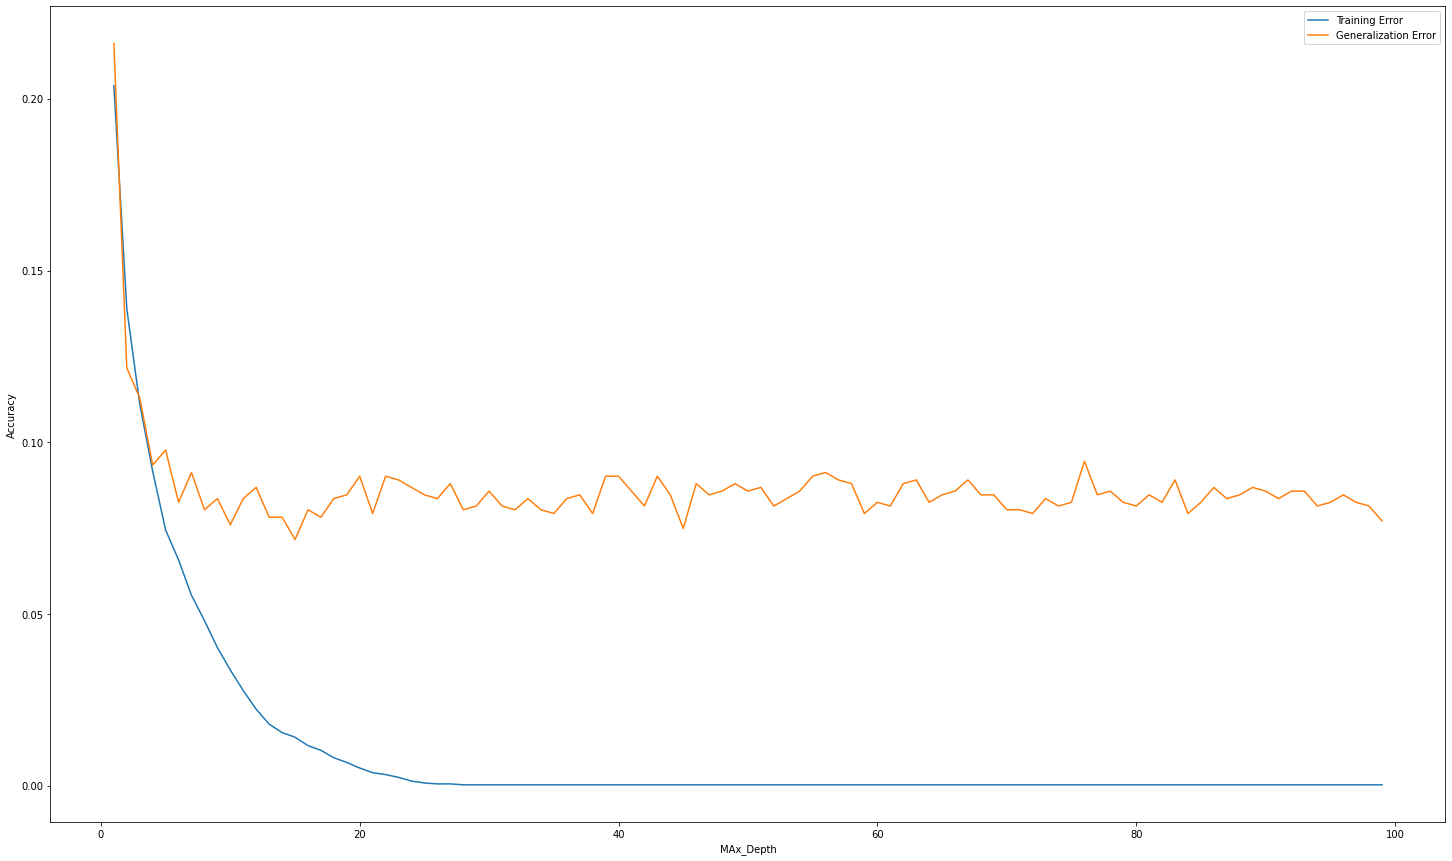

In [79]:
fig, ax = plt.subplots(figsize = (25,15))
print('Training Error :')
print(error_train_array)
print('Generalization Error :')
print(error_valid_array)
ax.set_xlabel('MAx_Depth')
ax.set_ylabel('Accuracy')

ax.plot(range(1,100), error_train_array, label = 'Training Error')
ax.plot(range(1,100), error_valid_array, label = 'Generalization Error')
ax.legend()

plt.show()

Result:- for ~**22** as max_depth Decision tree is average minimum gerenalization error and Minimum Training error

# 4. Feature Importance

In [80]:
dtree4 = tree.DecisionTreeClassifier(criterion = "entropy", random_state=30, max_depth = 22)
dtree4.fit(x_train,y_train)

# Training both Trees on same dataset 
dtree4.fit(x_train, y_train)

# PRedicitons
y_pred4 = dtree4.predict(x_test)

#accuracy
print('accuracy: ',accuracy_score(y_test, y_pred4))

import heapq

feature_imp = dtree4.feature_importances_
print('Top 10 features: ', feature_imp)

accuracy:  0.9185667752442996
Top 10 features:  [0.00374489 0.00109883 0.00600603 0.         0.02271458 0.00185734
 0.06990718 0.00728618 0.00151574 0.01094045 0.00585942 0.01026441
 0.00278808 0.00146428 0.         0.0440719  0.00441505 0.00608151
 0.02193577 0.0010717  0.02483774 0.00255994 0.00452989 0.00716991
 0.06393909 0.         0.03451102 0.00145928 0.         0.00344849
 0.         0.         0.00674225 0.         0.         0.00056348
 0.00848019 0.         0.00223563 0.         0.         0.00375551
 0.00163444 0.00071635 0.01761673 0.02592187 0.         0.
 0.00301045 0.00806053 0.         0.15745495 0.2643846  0.00229977
 0.07215697 0.0324654  0.02702219]


In [99]:
feature_imp.sort()
feature_imp[feature_imp.shape[0]-10 : feature_imp.shape[0]]

array([0.02592187, 0.02702219, 0.0324654 , 0.03451102, 0.0440719 ,
       0.06393909, 0.06990718, 0.07215697, 0.15745495, 0.2643846 ])